# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/)

# Import Statements

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

Reading the colors.csv file in the data folder and finding the total number of unique colours. [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique)

In [83]:
df_Colors = pd.read_csv("./data/colors.csv")
df_Colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [84]:
# con questo .unique() salvo la lista di oggetti unicio facenti parte della colonna "name" del df_colors
# una volta stampato il tipo di dati e visto che .unique() ritorna un array ho capito che per avere il numero di
# oggetti unici potevo semplicemente stampata la lunghezza di tale lista che risulta essere 135  
unique = df_Colors["name"].unique()
print(type(unique))

<class 'numpy.ndarray'>


In [85]:
len(unique)

135

the lego compagni produced <h3>135</h3> different colors

Finding the number of transparent colours where <code> is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [86]:
t_colors_num = df_Colors[df_Colors["is_trans"]=="t"].count()
f_colors_num = df_Colors[df_Colors["is_trans"]=="f"].count()
print(f'the transparent colors are:{t_colors_num}/{df_Colors.count()}\nThe non transparent colors are: {f_colors_num}/{df_Colors.count()}')

the transparent colors are:id          28
name        28
rgb         28
is_trans    28
dtype: int64/id          135
name        135
rgb         135
is_trans    135
dtype: int64
The non transparent colors are: id          107
name        107
rgb         107
is_trans    107
dtype: int64/id          135
name        135
rgb         135
is_trans    135
dtype: int64


In [87]:
df_Colors.groupby("is_trans").count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [88]:
df_Colors["is_trans"].value_counts().count()

2

<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="./assets/lego_themes.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.


<img src="./assets/lego_sets.png">

<h2>lego sets</h2>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

Reading the sets.csv data and take a look at the first and last couple of rows. 

In [89]:
df_sets = pd.read_csv("./data/sets.csv")

In [90]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [91]:
df_sets.year.sort_values()

9521     1949
9534     1949
9539     1949
9544     1949
9545     1949
         ... 
11289    2020
5147     2020
11337    2021
11335    2021
11334    2021
Name: year, Length: 15710, dtype: int64

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [92]:
first_year = df_sets[df_sets["year"] == 1949]
first_year

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [93]:
first_year["num_parts"].sum()

498

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [94]:
df_sets.sort_values("num_parts", ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


The largest LEGO set ever produced was The Ultimate Battle for Chima. This masterpiece was released in 2015 and consists of almost 10,000 pieces, precisely 9,987. 
It has enough pieces to ruin a life; I mean, a guy with no beard can start it and finish it with a white beard and zero hairs on his head.

<img src="./assets/lego chima.jpeg">

<code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year.

In [95]:
set_by_year = df_sets.groupby("year").count()
set_by_year["set_num"]

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
The .csv file is from late 2020, so to plot the full calendar years, I have exclude some data from the chart using the slicing techniques to avoid plotting the last two years; 
<br>
I slice in 2 different ways

In [96]:
set_by_year_slice = set_by_year.loc[1949:2019]
set_by_year_slice["set_num"]

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2015    774
2016    757
2017    786
2018    816
2019    840
Name: set_num, Length: 69, dtype: int64

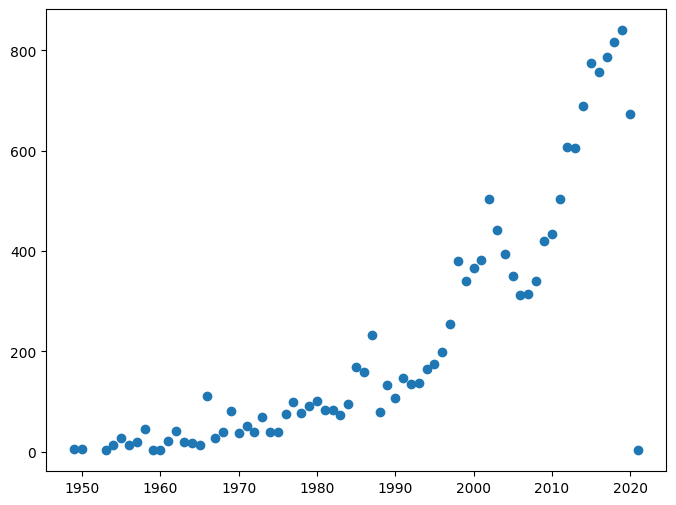

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(set_by_year.index, set_by_year["set_num"])
plt.show()

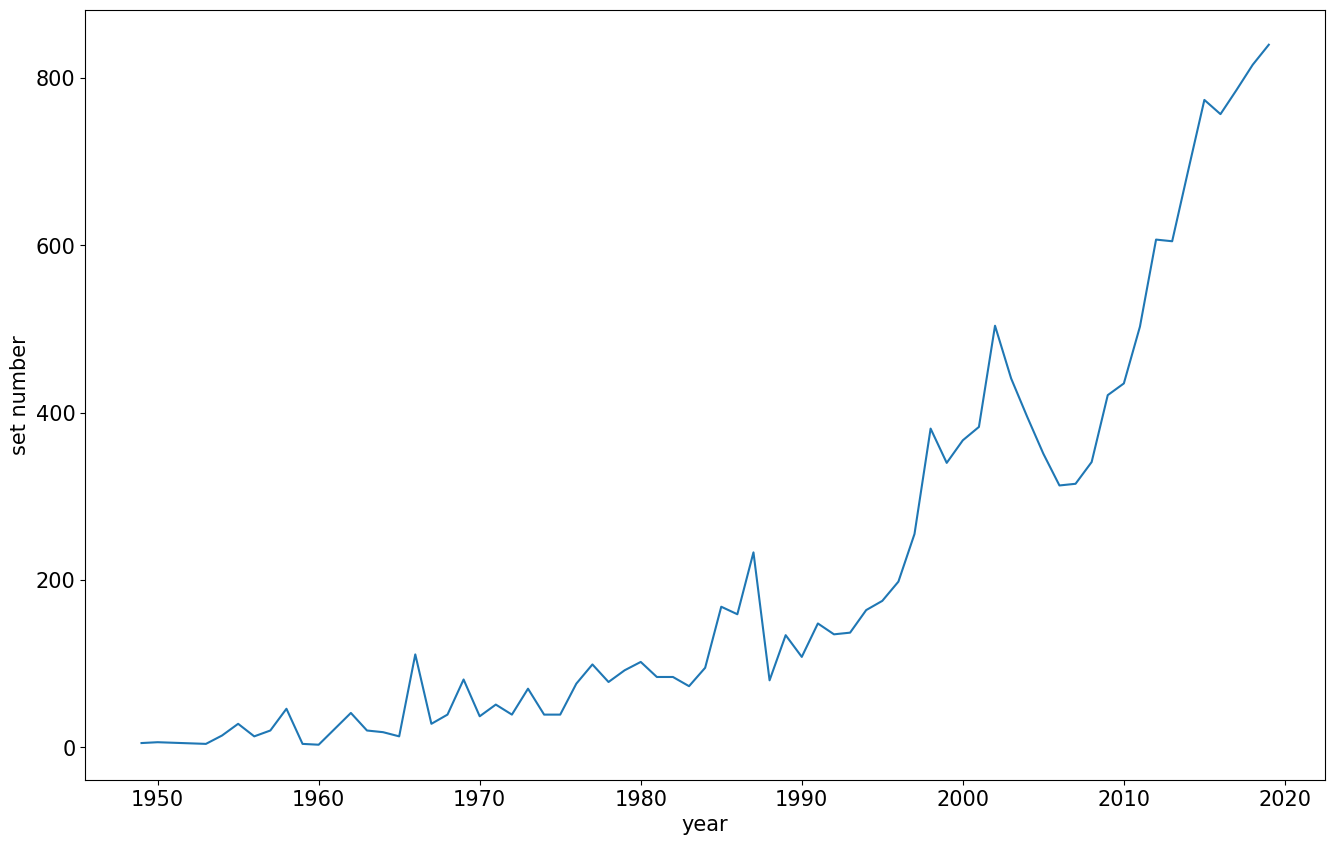

In [98]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("year", fontsize=15)
plt.ylabel("set number", fontsize=15)
#plt.xlim((1948,2020))
plt.plot(set_by_year_slice.index, set_by_year_slice["set_num"])


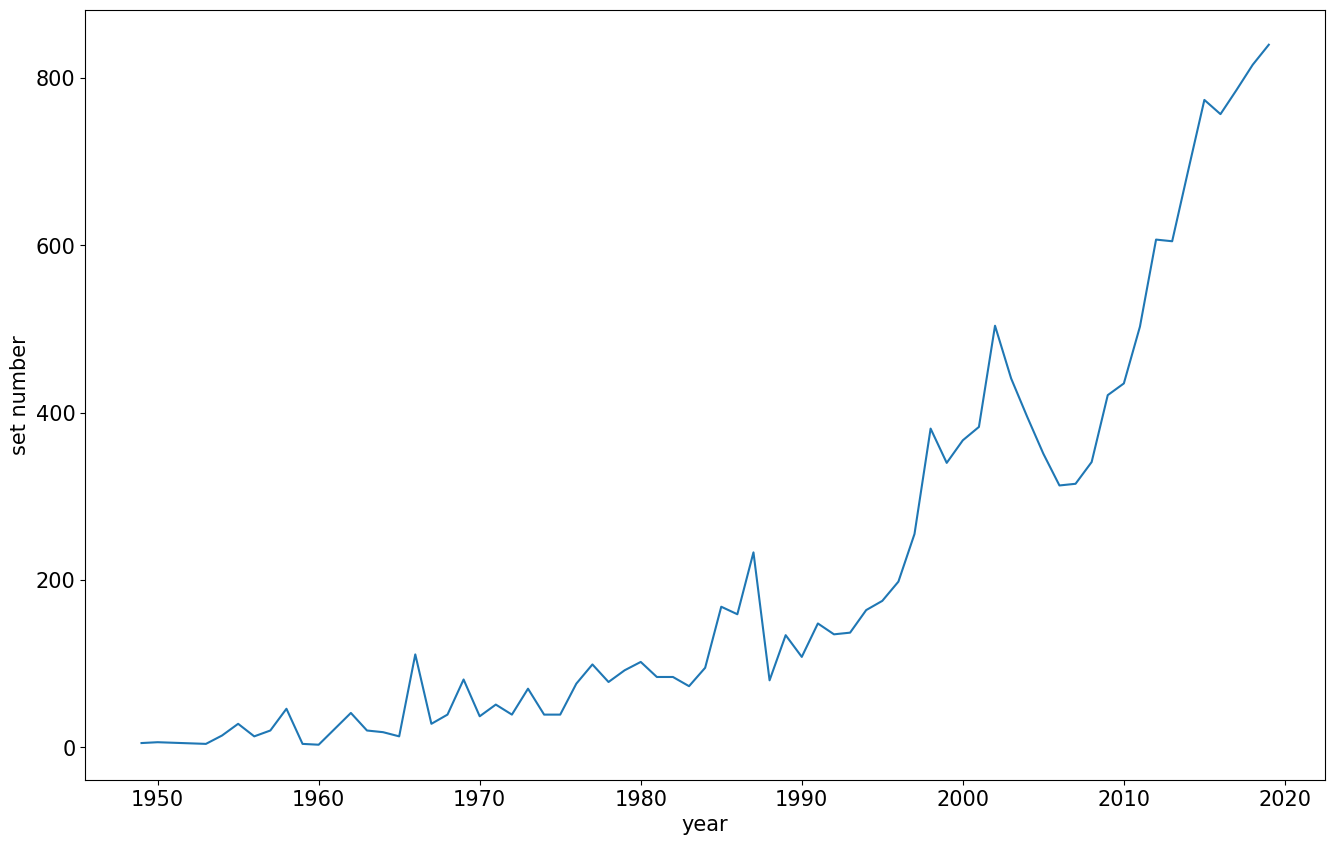

In [99]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("year", fontsize=15)
plt.ylabel("set number", fontsize=15)
plt.plot(set_by_year.index[:-2], set_by_year["set_num"][:-2])

we see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart

### Aggregate Data with the Python .agg() Function

group the set by year with <code>groupby()</code>, and count the number of unique 'theme_id' with <code>unique</code> method

In [100]:
theme_by_year = df_sets.groupby("year").agg({"theme_id": pd.Series.nunique})
theme_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [101]:
theme_by_year.rename(columns= {"theme_id": "nr_themes"}, inplace=True)
theme_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


Plotting the number of themes released by year on a line chart. Only include the full calendar years (i.e., excluding 2020 and 2021). 

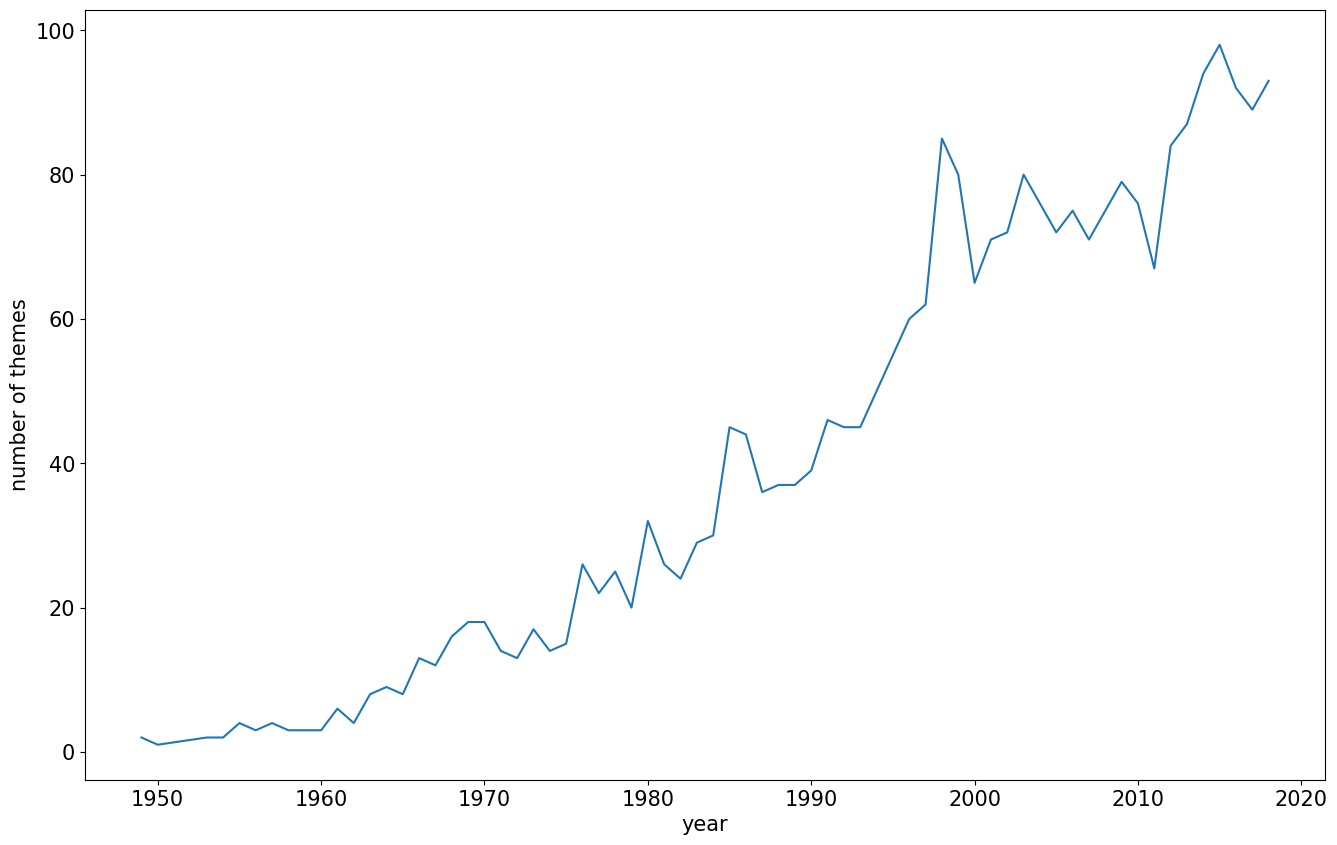

In [102]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("year", fontsize=15)
plt.ylabel("number of themes", fontsize=15)
plt.plot(theme_by_year.index[:-3], theme_by_year["nr_themes"][:-3])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'number of set')

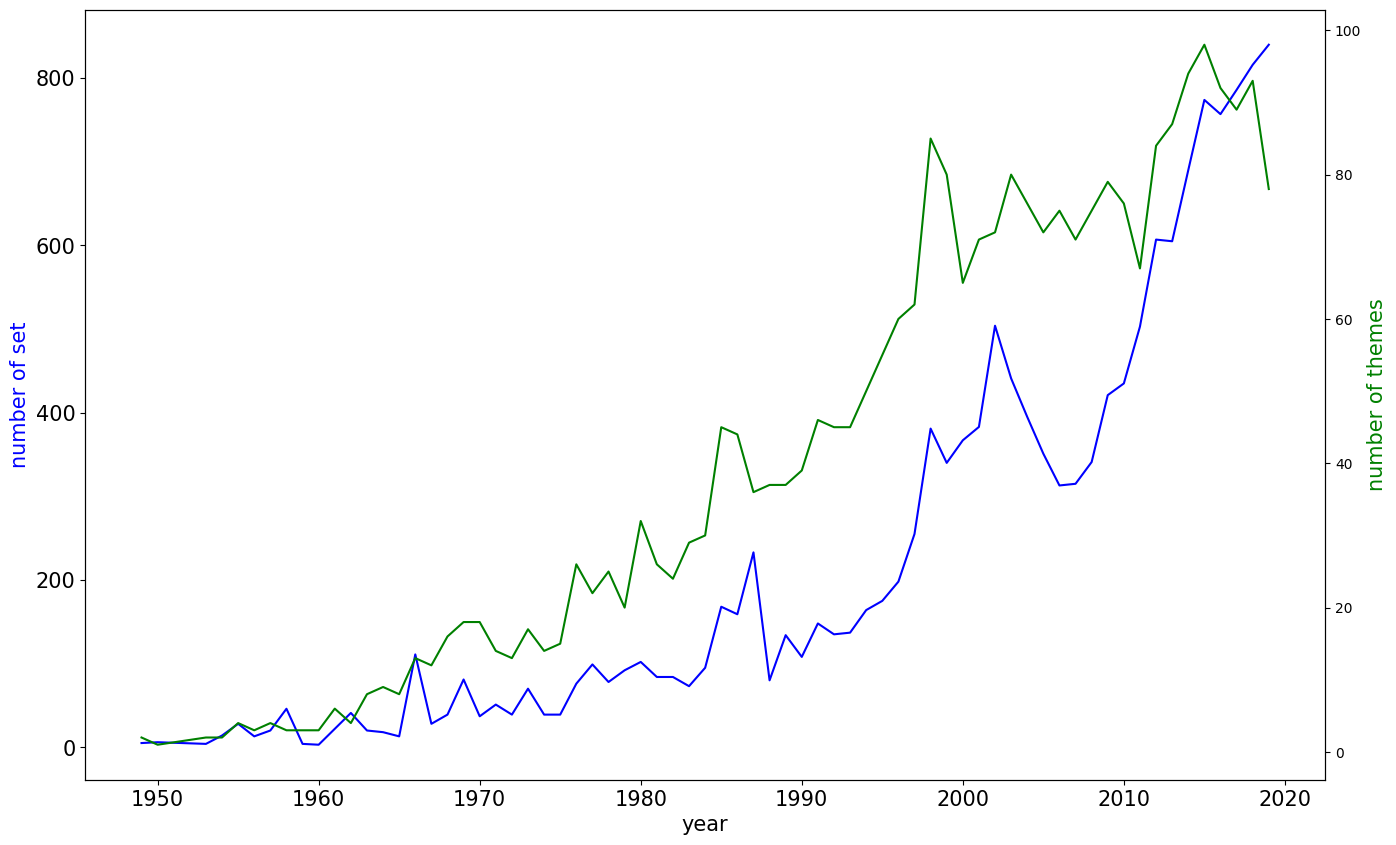

In [103]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlabel("year", fontsize=15)
#plt.ylabel("number of themes", fontsize=15)
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()
ax2.plot(theme_by_year.index[:-2], theme_by_year["nr_themes"][:-2], color="g")
ax1.plot(set_by_year.index[:-2], set_by_year["set_num"][:-2], color="b")
ax1.set_xlabel("year", fontsize=15)
ax2.set_ylabel("number of themes", fontsize=15, color="g")
ax1.set_ylabel("number of set", fontsize=15, color="blue")

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [104]:
parts_per_set = df_sets.groupby("year").agg({"num_parts":pd.Series.mean})
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


In [105]:
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots in Matplotlib

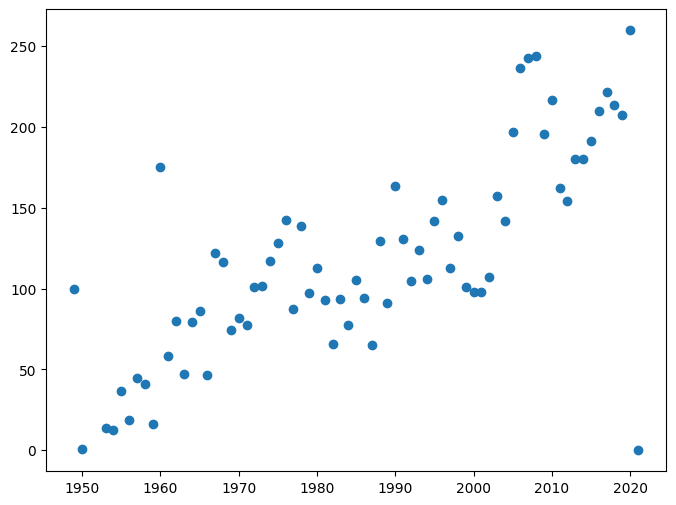

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(parts_per_set.index, parts_per_set["num_parts"])
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

https://i.imgur.com/Sg4lcjx.png

<img src="./assets/rebrickable_schema.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [107]:
df_themes = pd.read_csv("./data/themes.csv")
df_themes.shape

(596, 3)

In [108]:
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [109]:
df_themes[df_themes["name"] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [110]:
df_sets[df_sets["theme_id"] == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Merging (i.e., Combining) DataFrames based on a Key


In [111]:
set_theme_count = df_sets["theme_id"].value_counts()
set_theme_count[:5]

theme_id
158    753
501    656
494    398
435    356
503    329
Name: count, dtype: int64

Here I'm providing a dictionary to create the DataFrame. The keys in the dictionary become my column names.

In [51]:
set_theme_count = pd.DataFrame({"id": set_theme_count.index, 
                                "set_count": set_theme_count.values})

ValueError: Per-column arrays must each be 1-dimensional

In [76]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [77]:
merge_pd = pd.merge(set_theme_count, df_themes, on='id')

In [78]:
merge_pd.head(2)

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN


In [79]:
df_themes[df_themes["id"]==158]

,id,name,parent_id
150,158,Star Wars,NaN


In [80]:
set_theme_count[set_theme_count["id"]==158]

,id,set_count
0,158,753


<BarContainer object of 10 artists>

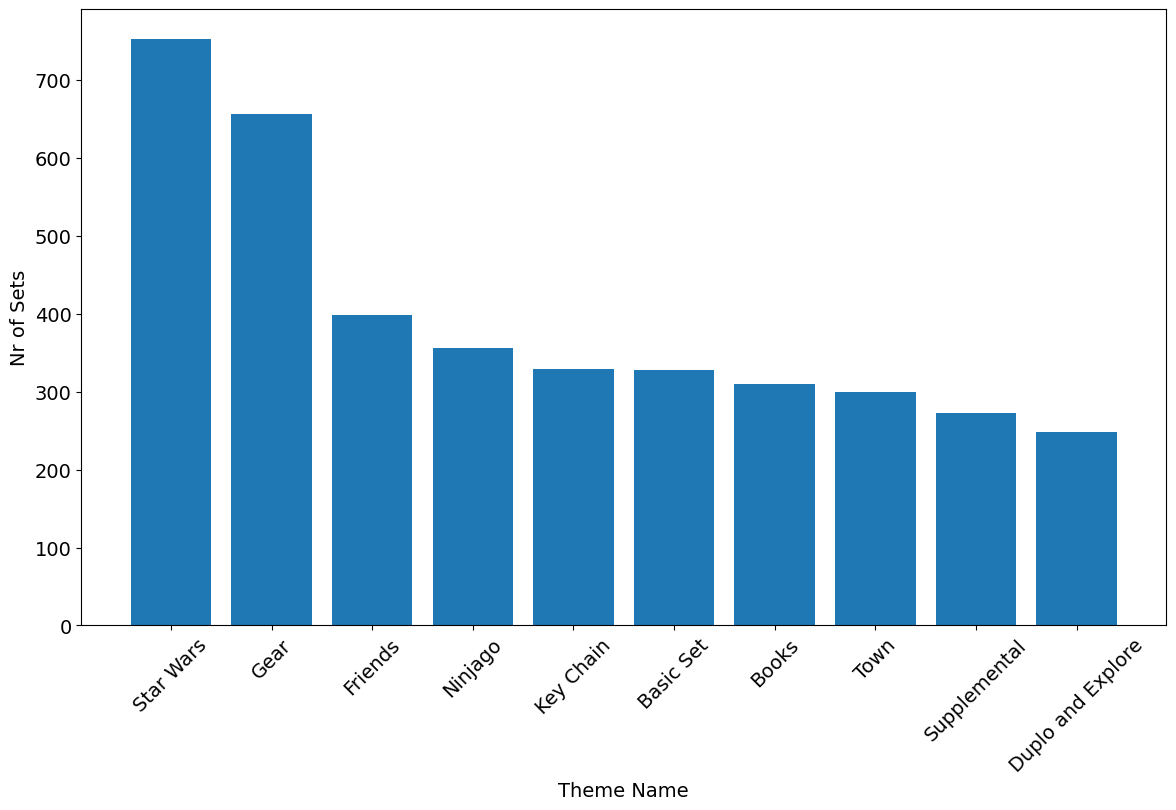

In [81]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merge_pd.name[:10], merge_pd["set_count"][:10])